### Your name:

<pre> Gibran Alva Sierra</pre>

### Collaborators:

<pre> Enter the name of the people you worked with if any</pre>


In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Open the housing data


In [38]:
import pandas as pd

HOUSING_CSV_URL = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ0CEgWKdZiWZQ5B2TEKuz3GCkw_Sr84mz7sOVYkRo8wyI4qs39HOCCBRZolmQDm26IRWVkrv7BZYip/pub?gid=1836074880&single=true&output=csv"

# Function to fetch housing data from the provided URL
def fetch_housing_data(csv_url=HOUSING_CSV_URL):
    try:
        housing_data = pd.read_csv(csv_url)
        return housing_data
    except Exception as e:
        print(f"Error fetching the data: {e}")
        return None

# Load the housing data
housing = fetch_housing_data()
housing.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


### Build full pipeline for the data analysis following the example of the notebook.
 Hint: the main part requested to change is the algorithm used (KNN regression)


#### Considerations for building pipeline:

- Make your notebook as compact as possible. 
- Split data into training and testing sets below.
- Convert all categorical data to one-hot vectors below
- Normalize all non-categorical data 
-  Perform KNN regression using a variety of values for n_neighbors (K) between 1 and 10 and both "uniform" and "distance" weights via a grid search where  *housing_labels* is the output and all other features are the input (similar to as seen in lecture two.)

In [39]:
# Write your code here: Splitting the Data and testing sets
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd

# This step categorizes the median_income column into discrete bins.
#Without this categorization, it would be difficult to maintain the distribution of a continuous variable like median_income.
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

#Performing the actual splitting into trainning sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# After the stratified split is done, the income_cat column is no longer needed for modeling. It is dropped to clean up the dataset.
strat_train_set.drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat", axis=1, inplace=True)

# Split the stratified train/test sets into X and y
X_train = strat_train_set.drop("median_house_value", axis=1)
y_train = strat_train_set["median_house_value"].copy()
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Print the sizes of the resulting datasets
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

#Display the test set
X_test.head()



Training set size: 16512
Test set size: 4128


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3905,-121.95,37.11,21,2387,357.0,913,341,7.7360,<1H OCEAN
16821,-118.01,33.89,36,1589,265.0,804,272,4.6354,<1H OCEAN
2900,-118.18,33.74,30,5915,1750.0,2136,1503,4.0968,NEAR OCEAN
7193,-122.48,37.74,52,2166,423.0,1072,370,4.1310,NEAR OCEAN
13928,-122.39,37.78,5,1405,515.0,725,392,3.6037,NEAR BAY


In [40]:
# Write your code here Convert all categorical data to one-hot vectors
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

cat_features = ["ocean_proximity"]
num_features = list(X_train.columns.difference(cat_features))

# Create a ColumnTransformer that applies the appropriate transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

#create a pipeline that first preprocesses the data using the ColumnTransformer.
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_prepared = pipeline.fit_transform(X_train)
X_test_prepared = pipeline.transform(X_test)


pd.DataFrame(X_test_prepared).head()



,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.415276,-0.602061,0.690153,-1.188103,2.043245,-0.468151,-0.429278,-0.115504,1.0,0.0,0.0,0.0,0.0
1,-0.595501,0.589800,-0.819296,0.781342,0.404345,-0.567716,-0.646336,-0.480685,1.0,0.0,0.0,0.0,0.0
2,2.619822,0.113056,-0.889612,0.696366,0.119655,0.648987,2.857269,1.498977,0.0,0.0,0.0,0.0,1.0
3,-0.339529,1.861119,0.985480,-1.453028,0.137732,-0.322914,-0.273562,-0.216638,0.0,0.0,0.0,0.0,1.0
4,-0.282066,-1.873380,1.004230,-1.408041,-0.140986,-0.639878,-0.056504,-0.564887,0.0,0.0,0.0,1.0,0.0


In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

# Write your code here:

# preprocessor needs to be change, so it can work with the knn regression model.
# For numerical features, impute missing values using the median.
# For categorical features, impute missing values using the most frequent value.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder())
        ]), cat_features)
    ])

# Create a pipeline that first applies the preprocessor and then the KNN regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])

# Define the parameter grid for grid search
param_grid = {
    'knn__n_neighbors': list(range(1, 11)),
    'knn__weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_



Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ...........knn__n_neighbors=1, knn__weights=uniform; total time=   0.1s
[CV] END ...........knn__n_neighbors=1, knn__weights=uniform; total time=   0.1s
[CV] END ...........knn__n_neighbors=1, knn__weights=uniform; total time=   0.0s
[CV] END ...........knn__n_neighbors=1, knn__weights=uniform; total time=   0.0s
[CV] END ...........knn__n_neighbors=1, knn__weights=uniform; total time=   0.1s
[CV] END ..........knn__n_neighbors=1, knn__weights=distance; total time=   0.0s
[CV] END ..........knn__n_neighbors=1, knn__weights=distance; total time=   0.1s
[CV] END ..........knn__n_neighbors=1, knn__weights=distance; total time=   0.1s
[CV] END ..........knn__n_neighbors=1, knn__weights=distance; total time=   0.0s
[CV] END ..........knn__n_neighbors=1, knn__weights=distance; total time=   0.0s
[CV] END ...........knn__n_neighbors=2, knn__weights=uniform; total time=   0.1s
[CV] END ...........knn__n_neighbors=2, knn__we

Best Parameters: {'knn__n_neighbors': 10, 'knn__weights': 'distance'}
Best Negative Mean Squared Error: -3595232696.684223
Test RMSE: 60106.37187610795


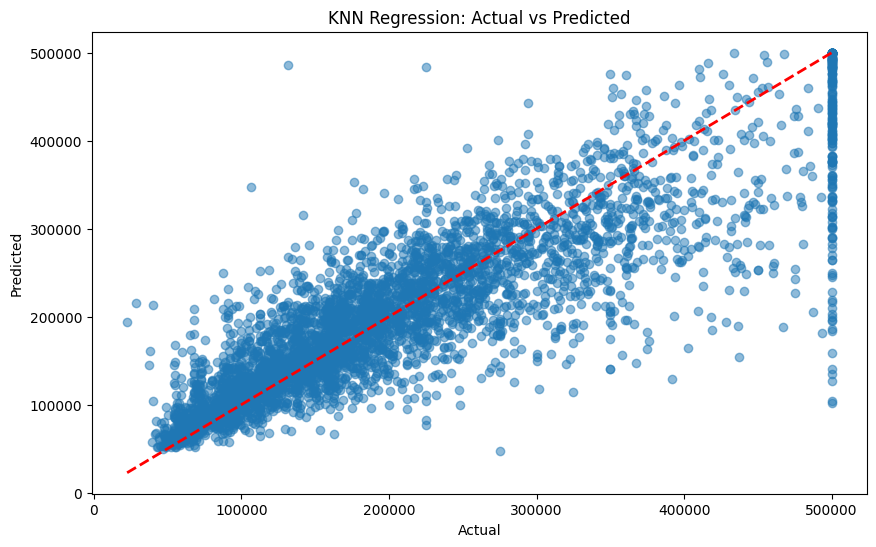

In [42]:
# Write your code here: Model Evaluation
from sklearn.metrics import mean_squared_error

print("Best Parameters:", best_params)
print("Best Negative Mean Squared Error:", best_score)

# Evaluate the model on the test set
final_model = grid_search.best_estimator_

# Use the preprocessor step to transform the test data
X_test_prepared = final_model.named_steps['preprocessor'].transform(X_test)
test_predictions = final_model.named_steps['knn'].predict(X_test_prepared)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)

print("Test RMSE:", rmse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN Regression: Actual vs Predicted')
plt.show()

### Conclusions
For what values of n_neighbors and weight does KNeighborsRegressor perform the best? Does it perform as well on the housing data as the linear regressor from the lectures? Why do you think this is?

<pre> WRITE RESPONSE HERE:

To achieve the best results with KNN regression, we found that the best values are knn__n_neighbors : 10 and weights: "distance" meaning the closer the neighbor is to each other, the more influence it will have in their final value. Despite these optimizations, the model's accuracy is still somewhat lacking, as indicated by an RMSE of 60106.37. Meaning the average error of the house pricing will be around 60 thousand dollars. 

Examining the scatter plot of actual versus predicted values, we see that while the mayority of the data follow the trend made by the KNN Regression, there is still a considerable spread of points away from the ideal line. This indicates there is still error in the model, and it needs to be improve in the future

Comparing this with the performance of the linear regression model, as detailed in the "02_end_to_end_machine_learning_project.ipynb" notebook, where the RMSE was 68628.1981984892, we conclude that the housing dataset has a better performance with the KNN Regression. This is thanks to the ability to capture the non-linear relationships and identifying the local patterns in the data.

</pre>

### Read appending B

- Reflect on your last data project, read appendix B. Then, write down a few of the checklist items that your last data project could have used. If you have not yet done a data project, then write down a few of the items that you found most interesting.


### Submit your notebook

Submit your solution to Quercus
Make sure you rename your notebook to    
W2_UTORid.ipynb    
Example W2_adfasd01.ipynb
